In [1]:
import os
import time as tm
import numpy as np
import pandas as pd
from scHPL import train, predict, evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from load_dataset import load_dataset
from mlp_generalized import run_mlp
from cnn_generalized import run_cnn
from onehotencode import onehotencode
from split_dataset import split_dataset
from results import result

In [2]:
data_path = '~/Documents/study/Masters DSS/Thesis/Data/AMB_integrated/integrated16.csv'
label_path = '~/Documents/study/Masters DSS/Thesis/Data/AMB_integrated/Labels16.csv'

X, Y = load_dataset(data_path, label_path)
print("shape of data: ", X.shape)
print("shape of labels:", Y.shape)

shape of data:  (1298, 2000)
shape of labels: (1298, 2)


In [3]:
Y.head()

,Class,cluster
0,GABA-ergic Neuron,Vip Mybpc1
1,GABA-ergic Neuron,Vip Parm1
2,Glutamatergic Neuron,L4 Ctxn3
3,GABA-ergic Neuron,Vip Chat
4,GABA-ergic Neuron,Vip Parm1


In [4]:
Y = Y['Class']
print("shape of labels now: ", Y.shape)

shape of labels now:  (1298,)


In [5]:
# one hot encode labels
ohe, y_dummy = onehotencode(Y)
print(y_dummy.shape)
# split the data into train, validation and test set
x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test = split_dataset(X, y_dummy)

(1298, 2)
shape of train set:  (1038, 2000)  and labels:  (1038, 2) 

shape of test set:  (260, 2000)  and labels:  (260, 2) 

Shape of train and validation set to check for overfitting
shape of train set:  (934, 2000)  and labels:  (934, 2) 

shape of validation set:  (104, 2000)  and labels:  (104, 2)


## Linear SVM performance

shape of labels in training set:  (1038,)
shape of labels in test set:  (260,)
Training time: 0.10650300979614258
Predict time: 0.01719498634338379
Accuracy of test set:  1.0
F1-score of test set:  1.0
Precision of test set: 1.0
Recall of test set: 1.0
Classification report of test set:
                       precision    recall  f1-score   support

   GABA-ergic Neuron       1.00      1.00      1.00       130
Glutamatergic Neuron       1.00      1.00      1.00       130

            accuracy                           1.00       260
           macro avg       1.00      1.00      1.00       260
        weighted avg       1.00      1.00      1.00       260



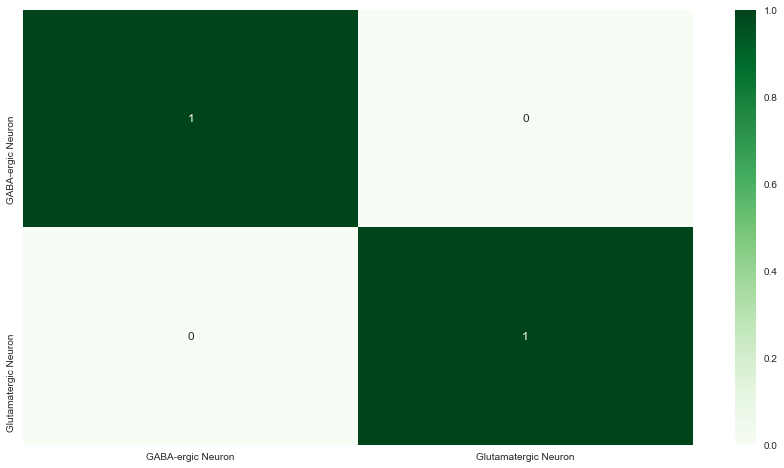

In [6]:
inv_train = ohe.inverse_transform(y_train).ravel()
inv_test = ohe.inverse_transform(y_test).ravel()
print("shape of labels in training set: ", inv_train.shape)
print("shape of labels in test set: ", inv_test.shape)

start = tm.time()
lin_svm = train.svm.LinearSVC()
lin_svm.fit(x_train, inv_train)
training_time = tm.time()-start
print('Training time:', training_time)

start = tm.time()
y_pred = lin_svm.predict(x_test)
test_time = tm.time()-start
print('Predict time:', test_time)

result(inv_test, y_pred)

## ANN performance

Train the model to check for overfitting


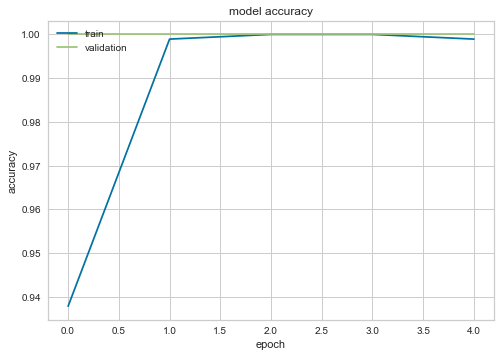

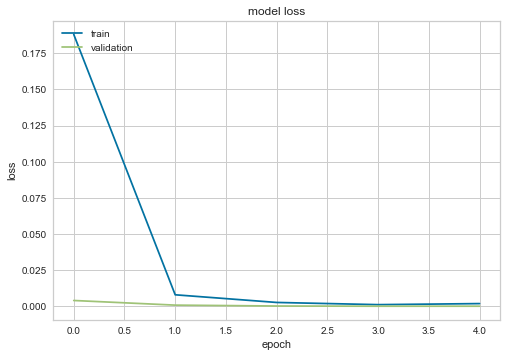

train the final model
Epoch 1/5
33/33 [==============================] - 0s 8ms/step - loss: 6.4946e-04 - accuracy: 1.0000
Epoch 2/5
33/33 [==============================] - 0s 8ms/step - loss: 5.1266e-04 - accuracy: 1.0000
Epoch 3/5
33/33 [==============================] - 0s 7ms/step - loss: 3.7997e-04 - accuracy: 1.0000
Epoch 4/5
33/33 [==============================] - 0s 8ms/step - loss: 4.6068e-04 - accuracy: 1.0000
Epoch 5/5
33/33 [==============================] - 0s 11ms/step - loss: 2.5454e-04 - accuracy: 1.0000
Training time: 1.4523637294769287
Predict time: 0.17432594299316406
The results are as follows:
Accuracy of test set:  1.0
F1-score of test set:  1.0
Precision of test set: 1.0
Recall of test set: 1.0
Classification report of test set:
                       precision    recall  f1-score   support

   GABA-ergic Neuron       1.00      1.00      1.00       130
Glutamatergic Neuron       1.00      1.00      1.00       130

            accuracy                           

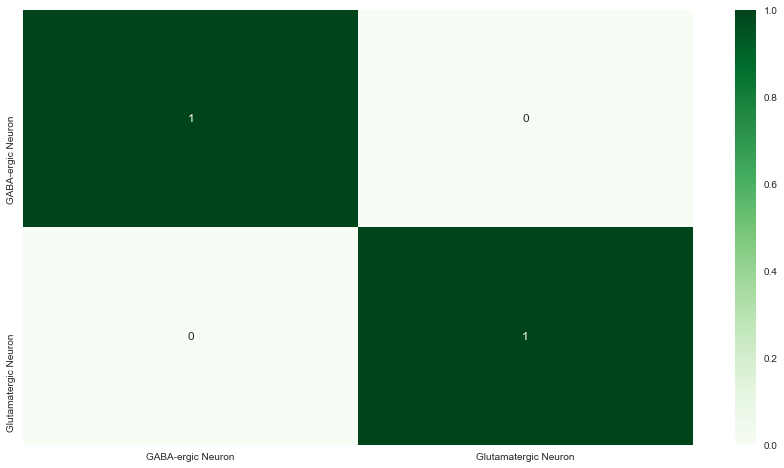

In [7]:
run_mlp(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)

## 1D-CNN performance

Train the model to check for overfitting


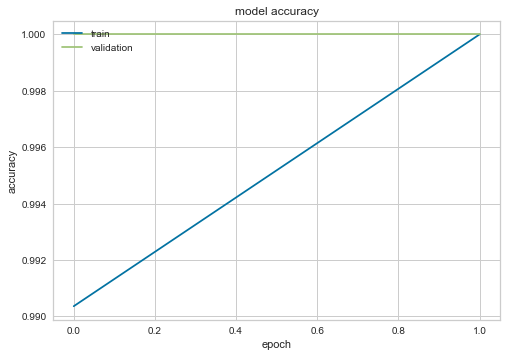

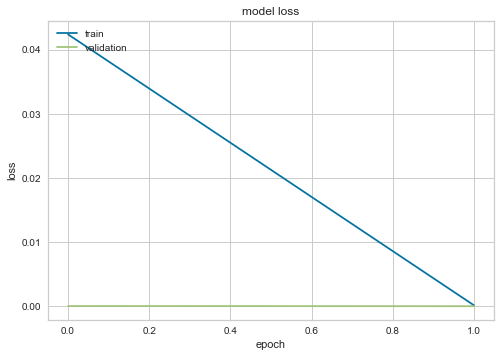

train the final model
Epoch 1/2
33/33 [==============================] - 4s 125ms/step - loss: 0.0010 - accuracy: 0.9990
Epoch 2/2
33/33 [==============================] - 4s 123ms/step - loss: 8.5167e-04 - accuracy: 1.0000
Training time: 8.254393100738525
Predict time: 0.2623119354248047
The results are as follows:
Accuracy of test set:  1.0
F1-score of test set:  1.0
Precision of test set: 1.0
Recall of test set: 1.0
Classification report of test set:
                       precision    recall  f1-score   support

   GABA-ergic Neuron       1.00      1.00      1.00       130
Glutamatergic Neuron       1.00      1.00      1.00       130

            accuracy                           1.00       260
           macro avg       1.00      1.00      1.00       260
        weighted avg       1.00      1.00      1.00       260



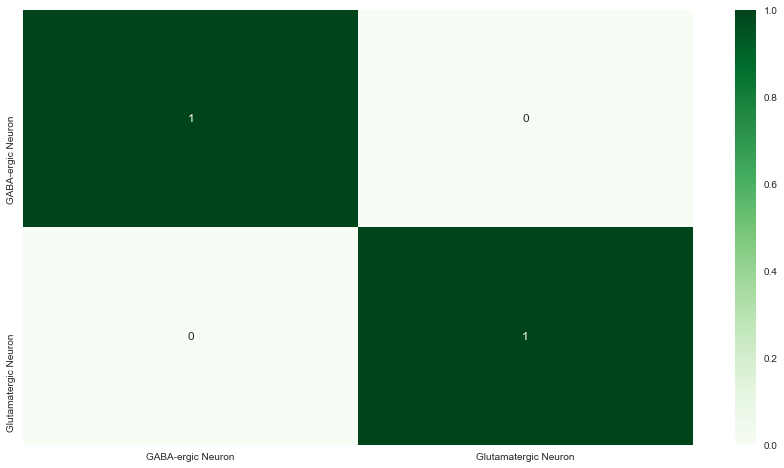

In [8]:
x_tr = np.expand_dims(x_tr,axis=-1)
x_val = np.expand_dims(x_val,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)
x_train = np.expand_dims(x_train,axis=-1)
run_cnn(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)